# BEIR Plots

This notebook is designed to visualize the results of BEIR hardware tests. It reads the results from CSV files, processes them, and generates plots to compare different configurations based on various metrics.

# Imports and dependencies

This section imports the required libraries for data manipulation and visualization.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Input variables

This section defines the base directory where the results are stored.

In [2]:
base_dir = "output/prova"

# Searching for files

This section searches for all CSV files that contain results in the specified directory and its subdirectories. The files are expected to be named "results.csv".

In [3]:
run_dirs = {}
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    results_path = os.path.join(folder_path, "results.csv")
    if os.path.isdir(folder_path) and os.path.isfile(results_path):
        run_dirs[folder_name] = folder_name.replace("_", " ")

# Reading and processing the data

This section reads each results file into a DataFrame, extracts the configuration name from the file path, and appends it to a list. Finally, it concatenates all DataFrames into a single DataFrame for further analysis.

In [4]:
all_results = []

for folder_name, label in run_dirs.items():
    file_path = os.path.join(base_dir, folder_name, "results.csv")
    df = pd.read_csv(file_path)
    df["method"] = label
    all_results.append(df)
    
df_all = pd.concat(all_results, ignore_index=True)

# Metrics to plot

This section defines the metrics to be plotted.

In [5]:
metrics = [col for col in df_all.columns if col not in ["k", "method"]]

# Plotting the metrics

This section reshapes the DataFrame for plotting and generates a plot to compare the specified metrics across different configurations. The plot is saved as an image file.

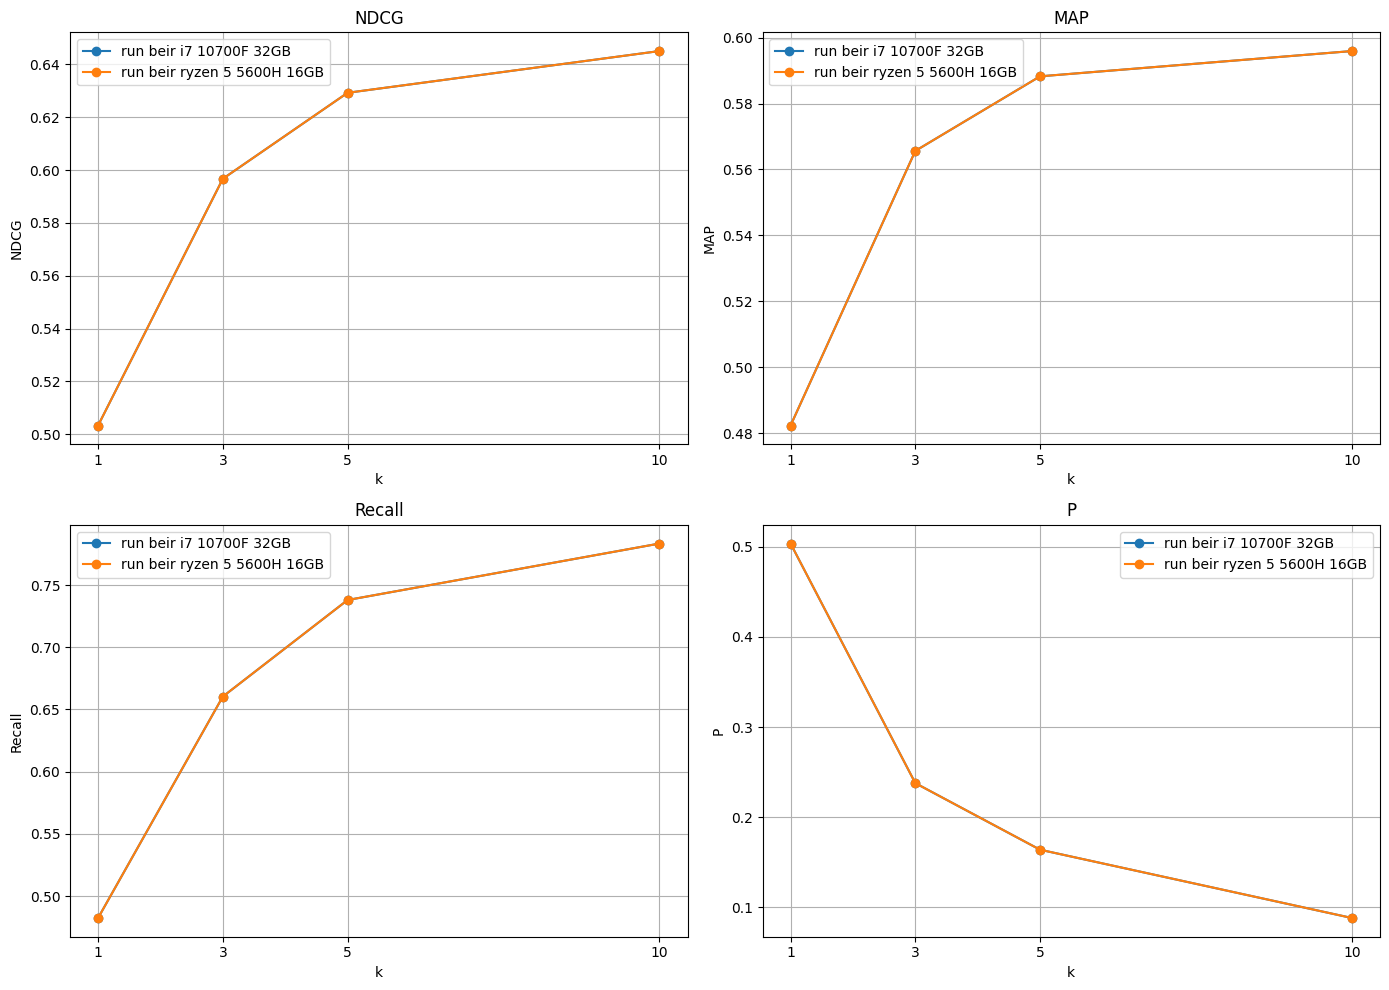

In [6]:
rows = (len(metrics) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(14, 5 * rows))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    for label in df_all["method"].unique():
        df_sub = df_all[df_all["method"] == label]
        ax.plot(df_sub["k"], df_sub[metric], marker="o", label=label)
    ax.set_title(metric)
    ax.set_xlabel("k")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)
    ax.set_xticks(
        df_all["k"].unique(),
    )
    
for j in range(len(metrics), len(axes)):
    axes[j].axis("off")

plt.tight_layout()

file_name = os.path.split(base_dir)[-1]
plt.savefig(os.path.join(base_dir, f"{file_name}_plot.png"), dpi=300)
plt.show()